In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import requests
import urllib

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import jieba

In [9]:
with open("1.csv", encoding="big5", errors='ignore') as f:
    text = f.read()
text

'"0.非常漂亮的外套，賣家出貨迅速，品質優良，回覆速度快，值得大家的購買，推薦給大家囉 。。。。。\n1.這次購買的褲子版型真的很好看！穿起來時尚、而且也很顯瘦????????褲子的質感也很好！非常的百搭、不容易退流行！怎麼穿搭都可以很有魅力??????！會繼續支持回購其他商品！好喜歡不踩雷！開心????\n2.原預計25出貨，但有提早出貨了，雖然也是滿久的，so若急件可能要有心理準備。\n線頭滿多的，但不是什麼大問題，唯一紫色肩膀處有髒汙，希望洗完後可以乾淨。\n?有臭臭的味道，天涼穿起來?該?滿暖和的。\n3.出貨可能要等一下子\n不過拿到商品的時候覺得物超所值\n品質也不錯  蠻好穿的！\n有機會會再回購！！??\n4.自訂款韓版經典運動連帽外套，材質一般般，與價值成正比，比較適合秋天穿，夏天穿還是會流汗。\n5.雖然出貨非常慢，但商品無誤、價格合理，以後有機會會再次回購的∼謝謝！\n6.好穿∼拿到∼好喜歡∼會在回購的∼出貨好快喔∼品質很好∼棒棒的∼∼∼\n7.價格親民，物超所值，很多顏色要買齊的概念，好穿好看已經買很多件了。\n8.其實以這種價格來講 材質已經不錯了\n這次出貨比以往快欸 有嚇到！！\n9.比預期的還要好看\n裡面還有微刷毛\n物超所值！！\n如有需要會再回購！\n10.衣服以後一定會再回購的喔！商品很棒，真的超讚超有用的，這裡價錢很優惠，買到非常開心。出貨速度也還可以，很棒很棒。\n11.超愛這家的衣服跟褲子，都很好看，賣家服務很好，商品超讚，出貨速度還可以\n12.超級喜歡！版型很大很寬鬆，就是我很想要的那種外套，而且裡面有舖毛，穿起來真的會暖，很適合天氣涼涼或在冷氣房的時候穿∼\n13.顏色超級好看的！！\n材質也非常好\n已經回購了很多次！\n這家超推薦！\n14.下單後非常快就出貨了，非常棒的賣家，而且商品無任何缺損，給5星完全沒有任何問題。\n15.超讚的出貨速度，超讚的商品品質，超讚的cp值，超讚的賣家，超讚的蝦皮.。賣家的包裝也仔細，回應也很好\n16.商品從下單到寄送到通知可以取貨其實蠻長的，但商品的確是便宜，品質就算了，只是顏色跟尺寸落差太大，大約小了兩個尺寸，顏色也差蠻多的\n17.很便宜的價格，普通外出時，當外套很適合，不知道會不會起毛球。\n18.包裝完整無缺損，商品品項規格數量均正確無誤，搭配蝦皮活動優惠價格實惠

In [2]:
import jieba.posseg as pseg  #使用pseq進行詞性標記

text = '我來到北京清華大學!'
words = pseg.cut(text)
for word, flag in words:
    print(word, flag)

我 r
來 v
到 v
北京 ns
清華大學 nt
! x


In [7]:
import jieba.analyse

text = '滋滋滋滋滋!!!'
tags = jieba.analyse.extract_tags(text, topK=6)  
#topK 為返回幾個TF/IDF 權重最大的關鍵詞，默認值為20
print(tags)

['滋滋']


In [23]:
Text=text
# 斷詞
seg_list = jieba.cut(Text, cut_all=False)
print('generator: ',seg_list)
for seg in seg_list:
    print(seg,end=' ')
print('')
seg_list = jieba.lcut(Text, cut_all=False)
print('list: ',seg_list)

generator:  <generator object Tokenizer.cut at 0x000001E783CCE200>
" 0 . 非常 漂亮 的 外套 ， 賣家 出貨 迅速 ， 品質 優良 ， 回覆 速度快 ， 值得 大家 的 購買 ， 推薦 給 大家 囉   。 。 。 。 。 
 1 . 這次 購買 的 褲子 版型 真的 很 好看 ！ 穿 起來 時尚 、 而且 也 很 顯瘦 ? ? ? ? ? ? ? ? 褲子 的 質感 也 很 好 ！ 非常 的 百 搭 、 不 容易 退 流行 ！ 怎麼 穿 搭 都 可以 很 有 魅力 ? ? ? ? ? ? ！ 會 繼續 支持 回購 其他 商品 ！ 好 喜歡 不 踩 雷 ！ 開心 ? ? ? ? 
 2 . 原 預計 25 出貨 ， 但 有 提早 出貨 了 ， 雖然 也 是 滿久 的 ， so 若 急件 可能 要 有 心理準備 。 
 線頭 滿多 的 ， 但 不是 什麼 大 問題 ， 唯一 紫色 肩膀 處 有 髒 汙 ， 希望 洗完 後 可以 乾淨 。 
 ? 有 臭臭 的 味道 ， 天涼 穿 起來 ? 該 ? 滿 暖和 的 。 
 3 . 出貨 可能 要 等 一下子 
 不過 拿到 商品 的 時候 覺得 物超所值 
 品質 也 不錯     蠻 好 穿 的 ！ 
 有 機會 會 再 回購 ！ ！ ? ? 
 4 . 自訂 款 韓版 經典 運動 連帽 外套 ， 材質 一般般 ， 與 價值 成正比 ， 比較 適合 秋天 穿 ， 夏天 穿 還是 會 流汗 。 
 5 . 雖然 出貨 非常 慢 ， 但 商品 無誤 、 價格合理 ， 以後 有 機會 會 再次 回購 的 ∼ 謝謝 ！ 
 6 . 好 穿 ∼ 拿到 ∼ 好 喜歡 ∼ 會 在 回購 的 ∼ 出貨 好 快 喔 ∼ 品質 很 好 ∼ 棒棒 的 ∼ ∼ ∼ 
 7 . 價格 親民 ， 物超所值 ， 很多 顏色 要 買 齊 的 概念 ， 好 穿 好看 已經 買 很多 件 了 。 
 8 . 其實 以 這種 價格 來講   材質 已經 不錯 了 
 這次 出貨 比 以往 快 欸   有 嚇到 ！ ！ 
 9 . 比 預期 的 還要 好看 
 裡面 還有 微 刷毛 
 物超所值 ！ ！ 
 如 有 需要 會 再 回購 ！ 
 10 . 衣服 以後 一定 會 再 回購 的

In [16]:
import jieba.analyse

text =text
tags = jieba.analyse.extract_tags(text, topK=16)  
#topK 為返回幾個TF/IDF 權重最大的關鍵詞，默認值為20
print(tags)

['出貨', '回購', '材質', '品質', '商品', '賣家', '包裝', '喜歡', '不錯', '起來', '適合', '顏色', '外套', '價格', '有點', '物超所值']


In [21]:
cutwordslist += [word for word in jieba.cut(text, cut_all=False) if word not in stopwords] 

NameError: name 'cutwordslist' is not defined

In [55]:
remove_words = [u'也',u',',u'很',u'∼',u'有',u'！',u'?',u'4',u'3',u'2',u'1',u'0',u'"',u'\n', u'.', u'的', u'，',u'但', u'是', u'會', u'對於', u'對',u'等',u'超',u'都',u'。',u' ',u'、',u'中',u'在',u'了',u'通常',u'如果',u'我們',u'需要'] 
# 自定義去除詞庫
seg_list_exact = jieba.cut(seg_list, cut_all = False) # 精確模式分詞
object_list = []
for word in seg_list: # 循環讀出每個分詞
    if word not in remove_words: # 如果不在去除詞庫中       
        object_list.append(word)
print(object_list)

['非常', '漂亮', '外套', '賣家', '出貨', '迅速', '品質', '優良', '回覆', '速度快', '值得', '大家', '購買', '推薦', '給', '大家', '囉', '這次', '購買', '褲子', '版型', '真的', '好看', '穿', '起來', '時尚', '而且', '顯瘦', '褲子', '質感', '好', '非常', '百', '搭', '不', '容易', '退', '流行', '怎麼', '穿', '搭', '可以', '魅力', '繼續', '支持', '回購', '其他', '商品', '好', '喜歡', '不', '踩', '雷', '開心', '原', '預計', '25', '出貨', '提早', '出貨', '雖然', '滿久', 'so', '若', '急件', '可能', '要', '心理準備', '線頭', '滿多', '不是', '什麼', '大', '問題', '唯一', '紫色', '肩膀', '處', '髒', '汙', '希望', '洗完', '後', '可以', '乾淨', '臭臭', '味道', '天涼', '穿', '起來', '該', '滿', '暖和', '出貨', '可能', '要', '一下子', '不過', '拿到', '商品', '時候', '覺得', '物超所值', '品質', '不錯', '蠻', '好', '穿', '機會', '再', '回購', '自訂', '款', '韓版', '經典', '運動', '連帽', '外套', '材質', '一般般', '與', '價值', '成正比', '比較', '適合', '秋天', '穿', '夏天', '穿', '還是', '流汗', '5', '雖然', '出貨', '非常', '慢', '商品', '無誤', '價格合理', '以後', '機會', '再次', '回購', '謝謝', '6', '好', '穿', '拿到', '好', '喜歡', '回購', '出貨', '好', '快', '喔', '品質', '好', '棒棒', '7', '價格', '親民', '物超所值', '很多', '顏色', '要', '買', '齊', '概念', '好', '穿', '好看', '已經', '買', 

In [100]:
# 統計詞頻
seg_list=object_list
import pandas as pd
def count_segment_freq(seg_list):
    seg_df = pd.DataFrame(seg_list,columns=['seg'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq)
    return sef_freq
sef_freq = count_segment_freq(seg_list)
sef_freq.head(40)
sef_freq.to_excel('文字.xlsx') 
#輸出Excel

In [57]:
sef_freq.head(40)

,count
seg,
商品,21
出貨,19
好,18
回購,16
穿,15
可以,13
非常,12
品質,11
材質,11


Building prefix dict from C:\Users\USER\Desktop\python\dict.txt.big ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.u3bd7ea763682f660352c8f4e3d32ac7f.cache
Loading model cost 1.182 seconds.
Prefix dict has been built successfully.


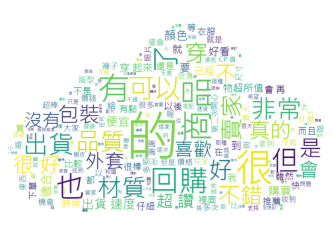

In [17]:
# 文字雲(文字放入1.csv,要有picture.png文字雲造型圖片)
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import jieba
import numpy as np
# 如果檔案內有一些編碼錯誤，使用 errors='ignore' 來忽略錯誤
with open("1.csv", encoding="big5", errors='ignore') as f:
    text = f.read()

# 設定使用 big5 斷詞
jieba.set_dictionary('dict.txt.big')
wordlist = jieba.cut(text)
words = " ".join(wordlist)
#文字雲造型圖片
mask = np.array(Image.open('picture.png')) #文字雲形狀
# 從 Google 下載的中文字型
font = 'C:/Users/USER/Downloads/msjh.ttf'
#背景顏色預設黑色，改為白色、使用指定圖形、使用指定字體
my_wordcloud = WordCloud(background_color='white',mask=mask,font_path=font).generate(words)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()
#存檔
# wordcloud.to_file('word_cloud.png')

In [60]:
sentment_table = pd.read_excel('/Users/USER/Desktop/python/情感词典修改版.xlsx')
sentment_table.drop(['Unnamed: 10','Unnamed: 11'],inplace=True,axis=1)
pos_table = pd.read_excel('/Users/USER/Desktop/python/情感词典修改版.xlsx',sheet_name='Sheet2')
neg_table = pd.read_excel('/Users/USER/Desktop/python/情感词典修改版.xlsx',sheet_name='Sheet3')

In [75]:
pos_dict = dict(zip(list(pos_table.posword)))
#                     ,list(pos_table.score))
# neg_dict = dict(zip(list(neg_table.negword)))
# ,map(lambda a:a*(0-1),list(neg_table.score))))
# sentment_dict={**pos_dict,**neg_dict}


KeyError: 11241

In [98]:
import jieba
import numpy as np

# 打开词典文件，返回列表
def open_dict(Dict='hahah',path = r'/Users/USER/Desktop/python'):
    path = path + '%s.txt' %Dict
    dictionary = open(path, 'r', encoding='utf-8')
    dict = []
    for word in dictionary:
        word = word.strip('\n')
        dict.append(word)
    return dict

def judgeodd(num):
    if num % 2 == 0:
        return 'even'
    else:
        return 'odd'

deny_word = open_dict(Dict='否定词',path=r'/Users/USER/Desktop/python/1922797046/情感极性词典/')
posdict = open_dict(Dict='正面情绪词',path=r'/Users/USER/Desktop/python/1922797046/情感极性词典/')
negdict = open_dict(Dict = '负面情绪词',path=r'/Users/USER/Desktop/python/1922797046/情感极性词典/')

degree_word = open_dict(Dict = '程度副词',path=r'/Users/USER/Desktop/python/1922797046/情感极性词典/')
# mostdict = degree_word[degree_word.index('extreme')+1: degree_word.index('very')] #权重4，即在情感前乘以3
# verydict = degree_word[degree_word.index('very')+1: degree_word.index('more')] #权重3
# moredict = degree_word[degree_word.index('more')+1: degree_word.index('ish')]#权重2
# ishdict = degree_word[degree_word.index('ish')+1: degree_word.index('last')]#权重0.5

mostdict =['超'] #权重4，即在情感前乘以3
verydict = ['百分之百'] #权重3
moredict = ['较']#权重2
ishdict = ['還']#权重0.5


def sentiment_score_list(dataset):
    seg_sentence = dataset.split('。')

    count1 = []
    count2 = []
    for sen in seg_sentence: # 循环遍历每一个评论
        segtmp = jieba.lcut(sen, cut_all=False) # 把句子进行分词，以列表的形式返回
        i = 0 #记录扫描到的词的位置
        a = 0 #记录情感词的位置
        poscount = 0 # 积极词的第一次分值
        poscount2 = 0 # 积极反转后的分值
        poscount3 = 0 # 积极词的最后分值（包括叹号的分值）
        negcount = 0
        negcount2 = 0
        negcount3 = 0
        for word in segtmp:
            if word in posdict: # 判断词语是否是情感词
                poscount +=1
                c = 0
                for w in segtmp[a:i]: # 扫描情感词前的程度词
                    if w in mostdict:
                        poscount *= 4.0
                    elif w in verydict:
                        poscount *= 3.0
                    elif w in moredict:
                        poscount *= 2.0
                    elif w in ishdict:
                        poscount *= 0.5
                    elif w in deny_word: c+= 1
                if judgeodd(c) == 'odd': # 扫描情感词前的否定词数
                    poscount *= -1.0
                    poscount2 += poscount
                    poscount = 0
                    poscount3 = poscount + poscount2 + poscount3
                    poscount2 = 0
                else:
                    poscount3 = poscount + poscount2 + poscount3
                    poscount = 0
                a = i+1
            elif word in negdict: # 消极情感的分析，与上面一致
                negcount += 1
                d = 0
                for w in segtmp[a:i]:
                    if w in mostdict:
                        negcount *= 4.0
                    elif w in verydict:
                        negcount *= 3.0
                    elif w in moredict:
                        negcount *= 2.0
                    elif w in ishdict:
                        negcount *= 0.5
                    elif w in degree_word:
                        d += 1
                if judgeodd(d) == 'odd':
                    negcount *= -1.0
                    negcount2 += negcount
                    negcount = 0
                    negcount3 = negcount + negcount2 + negcount3
                    negcount2 = 0
                else:
                    negcount3 = negcount + negcount2 + negcount3
                    negcount = 0
                a = i + 1
            elif word == '！' or word == '!': # 判断句子是否有感叹号
                for w2 in segtmp[::-1]: # 扫描感叹号前的情感词，发现后权值+2，然后退出循环
                    if w2 in posdict or negdict:
                        poscount3 += 2
                        negcount3 += 2
                        break
            i += 1

            # 以下是防止出现负数的情况
            pos_count = 0
            neg_count = 0
            if poscount3 <0 and negcount3 > 0:
                neg_count += negcount3 - poscount3
                pos_count = 0
            elif negcount3 <0 and poscount3 > 0:
                pos_count = poscount3 - negcount3
                neg_count = 0
            elif poscount3 <0 and negcount3 < 0:
                neg_count = -pos_count
                pos_count = -neg_count
            else:
                pos_count = poscount3
                neg_count = negcount3
            count1.append([pos_count,neg_count])
        count2.append(count1)
        count1=[]

    return count2

def sentiment_score(senti_score_list):
    score = []
    for review in senti_score_list:
        score_array =  np.array(review)
        Pos = np.sum(score_array[:,0])
        Neg = np.sum(score_array[:,1])
        AvgPos = np.mean(score_array[:,0])
        AvgPos = float('%.lf' % AvgPos)
        AvgNeg = np.mean(score_array[:, 1])
        AvgNeg = float('%.1f' % AvgNeg)
        StdPos = np.std(score_array[:, 0])
        StdPos = float('%.1f' % StdPos)
        StdNeg = np.std(score_array[:, 1])
        StdNeg = float('%.1f' % StdNeg)
        score.append([Pos,Neg,AvgPos,AvgNeg,StdPos,StdNeg])
    return score

data = '你就是个王八蛋，混账玩意!你们的手机真不好用！非常生气，我非常郁闷！！！！'
data2= '我好开心啊，非常非常非常高兴！今天我得了一百分，我很兴奋开心，愉快，开心'

print(sentiment_score(sentiment_score_list(data)))
print(sentiment_score(sentiment_score_list(data2)))

[[104.0, 119.0, 4.0, 4.8, 3.9, 3.2]]
[[45, 30, 2.0, 1.4, 1.8, 0.9]]


In [99]:
text = u"我今天很快樂。我今天很憤怒。"
from snownlp import SnowNLP
s = SnowNLP(text)

ModuleNotFoundError: No module named 'snownlp'